In [1]:
from tqdm import tqdm
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as T
from data.pacs_h5_dataset import PACSDataset
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import functional as FT

In [2]:
dataset = PACSDataset(
    root='./PACS.hdf5',
    leave_out=['sketch', 'cartoon'],
    transform=T.ToTensor()
)

In [3]:
dataloader = DataLoader(dataset, batch_size=64, num_workers=4)

In [4]:
for batch in tqdm(dataloader):
    pass

100%|██████████| 59/59 [00:06<00:00,  9.25it/s]


In [5]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = FT.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

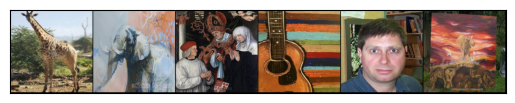

In [6]:
show(make_grid(batch[0][:]))